In [1]:
from datasets import load_dataset
import spacy

from pathlib import Path
from os import listdir
from os.path import isfile, join
import os
import pandas as pd
import nltk
import spacy
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# This notebook will run clustering analysis on the test set of the cnn/dm articles.
# it will be able to analyze the affect of clustering through 
#### PCA and t-SNE visualizations,
#### Word clouds of each cluster + top 10 words
#### 

# Parameters include 
# stopword set 
#### show the affect on the histogram of unigrams in the articles, highlights, and summaries.

# Show amount of articles not in the same clusters across different clustering techniques

In [3]:
# get dataframes of article test set, 
## raw text, highlights, small model summaries and sota model summaries

# data cleaning functions with varying degrees of stop word removal
## function for visualizing unigram counts + with stop word set

# Kmeans clustering grid search
## save graph automatically

# PCA visualization
# t-SNE visualization

# word cloud function for all clusters
# top 10 words function
## save graph automatically

In [4]:
def get_article_data():
    """gets the test_df for cnn_dailymail"""
    dataset = load_dataset('cnn_dailymail', '3.0.0')
    df = pd.DataFrame(dataset['test'])
    return df

In [5]:
df = get_article_data()

Reusing dataset cnn_dailymail (C:\Users\Cooper\.cache\huggingface\datasets\cnn_dailymail\3.0.0\3.0.0\3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
df.columns

Index(['article', 'highlights', 'id'], dtype='object')

In [7]:
def get_summary_data():
    """gets the summaries of the test data for cnn_dailymail into pandas dataframe"""
    pass

In [8]:
def compare_original_clean(df):
    """compares the an original article with the cleaned one."""
    print(f"Original Article\n{df['article'][0]}")
    print(f"Original Highlights\n{df['highlights'][0]}")
    print()
    print(f"Original Article\n{df['clean_article'][0]}")
    print(f"Original Highlights\n{df['clean_highlights'][0]}")

In [9]:
def get_stop_words():
    """gets the stop words list"""
    stopwords = nltk.corpus.stopwords.words('english')
    return stopwords

In [10]:
from nltk.stem.snowball import SnowballStemmer, PorterStemmer
# stemmer = SnowballStemmer("english")
stemmer = PorterStemmer()

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [11]:
stopwords = get_stop_words()
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
def clean_stopwords(stopwords):
    """extends stopwords with the stemmed versions as well"""
    
    processed_stopwords = []
    tok_stem_stopwords = tokenize_and_stem(" ".join(stopwords))
    
    for tok in tok_stem_stopwords:
        processed_stopwords.append(tok)
    all_stopwords = processed_stopwords + stopwords
    return all_stopwords

In [13]:
cleaned_stopwords = clean_stopwords(stopwords)
print(cleaned_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'our', 'ourselv', 'you', 'you', "'re", 'you', "'ve", 'you', "'ll", 'you', "'d", 'your', 'your', 'yourself', 'yourselv', 'he', 'him', 'hi', 'himself', 'she', 'she', "'s", 'her', 'her', 'herself', 'it', 'it', "'s", 'it', 'itself', 'they', 'them', 'their', 'their', 'themselv', 'what', 'which', 'who', 'whom', 'thi', 'that', 'that', "'ll", 'these', 'those', 'am', 'is', 'are', 'wa', 'were', 'be', 'been', 'be', 'have', 'ha', 'had', 'have', 'do', 'doe', 'did', 'do', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'becaus', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'dure', 'befor', 'after', 'abov', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'onc', 'here', 'there', 'when', 'where', 'whi', 'how', 'all', 'ani', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'onli', 'own', 'same', 'so', 'than', 'to

In [14]:
def clean_data(df):
    """removes stop words, makes everything lowercase, removes punctuation"""
    punctuation_signs = list("?:!,;'")

    # removing special characters
    df['clean_article'] = df['article'].str.replace("\r", " ")
    df['clean_article'] = df['article'].str.replace("\n", " ")
    df['clean_article'] = df['article'].str.replace("    ", " ")

    # lowercasing text
    df['clean_article'] = df['article'].str.lower()

    # removing punctuation
    for punct_sign in punctuation_signs:
        df['clean_article'] = df['article'].str.replace(punct_sign, '')

        
    # remove possesive pronouns
    df['clean_highlights'] = df['highlights'].str.replace("'s", '')
    
    # removing special characters
    df['clean_highlights'] = df['highlights'].str.replace("\r", " ")
    df['clean_highlights'] = df['highlights'].str.replace("\n", " ")
    df['clean_highlights'] = df['highlights'].str.replace("    ", " ")

    # lowercasing text
    df['clean_highlights'] = df['highlights'].str.lower()

    # removing punctuation
    for punct_sign in punctuation_signs:
        df['clean_highlights'] = df['highlights'].str.replace(punct_sign, '')

    # remove possesive pronouns
    df['clean_highlights'] = df['highlights'].str.replace("'s", '')
    
    return df

In [15]:
df = clean_data(df)

C:\Users\Cooper\AppData\Local\Temp/ipykernel_17116/2741784634.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['clean_article'] = df['article'].str.replace(punct_sign, '')
C:\Users\Cooper\AppData\Local\Temp/ipykernel_17116/2741784634.py:31: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['clean_highlights'] = df['highlights'].str.replace(punct_sign, '')


In [16]:
def get_vocab_tokenized_stemmed(df):
    """tokenizes and stems the article of each row, 
       returns the total vocab stemmed and tokenized"""
    # http://brandonrose.org/clustering
    
    nltk.download('punkt')
    
    totalvocab_stemmed = []
    totalvocab_tokenized = []
    
    length_df = len(df)
    
    def per_row(row):
        if row.name % 500 == 0:
            print(f"Tokenizing and stemming row: {row.name} / {length_df}")
        allwords_stemmed = tokenize_and_stem(row.article) #for each article, tokenize/stem
        totalvocab_stemmed.extend(allwords_stemmed) # extend the 'totalvocab_stemmed' list

        allwords_tokenized = tokenize_only(row.article)
        totalvocab_tokenized.extend(allwords_tokenized)
    
    df.apply(per_row, axis=1)
    
    # print(f"All Vocab Tokenized:\n{totalvocab_tokenized}")
    
    vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
    print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')
    
    return totalvocab_stemmed, totalvocab_tokenized

In [ ]:
totalvocab_stemmed, totalvocab_tokenized = get_vocab_tokenized_stemmed(df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cooper\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokenizing and stemming row: 0 / 11490
Tokenizing and stemming row: 500 / 11490
Tokenizing and stemming row: 1000 / 11490


In [ ]:
df.columns

In [ ]:
def get_unigram_counts(df):
    """visualizes the count of words of whole corpus"""
    tokens = []
    
    def per_row(row):
        if row.name % 1000 == 0:
            print(f"Tokenizing row: {row.name} / {len(df)}")
        tokens.extend(nltk.word_tokenize(row["clean_article"]))

    df.apply(per_row, axis=1)
    
    unigram_count = Counter(tokens)
    
    return unigram_count

In [ ]:
unigram_count = get_unigram_counts(df)

In [ ]:
unigram_count.most_common(100)

In [ ]:
def get_extended_stopwords(most_counted):
    """returns a list of the top words"""
    extended_stopwords = []
    for item in most_counted:
        extended_stopwords.append(item[0])
    return extended_stopwords

In [ ]:
ext_stopwords = get_extended_stopwords(unigram_count.most_common(100))

In [ ]:
print(ext_stopwords)

In [ ]:
clean_ext_stopwords = clean_stopwords(ext_stopwords)
print(clean_ext_stopwords)

In [ ]:
# makes master list of stop words removing 100 most occuring tokens in articles
extended_stopwords = cleaned_stopwords + clean_ext_stopwords
extended_stopwords.append("becau")
print(extended_stopwords)

In [ ]:
cleaned_stopwords.append("becau")

In [ ]:
tfidf_vectorizer_1 = TfidfVectorizer(max_df=0.8, max_features=200000,
                                   min_df=0.2, stop_words=cleaned_stopwords,
                                   use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix_1 = tfidf_vectorizer_1.fit_transform(df.clean_article) #fit the vectorizer to the articles
#tfidf_matrix_highlights = tfidf_vectorizer.fit_transform(
#    df.clean_highlights) #fit the vectorizer to the highlights

In [149]:
tfidf_vectorizer_2 = TfidfVectorizer(max_df=0.95, max_features=200000,
                                   min_df=0.05, stop_words=cleaned_stopwords,
                                   use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix_2 = tfidf_vectorizer_2.fit_transform(df.clean_article) #fit the vectorizer to the articles
#tfidf_matrix_highlights = tfidf_vectorizer.fit_transform(
#    df.clean_highlights) #fit the vectorizer to the highlights

In [40]:
tfidf_vectorizer_3 = TfidfVectorizer(max_df=0.95, max_features=100000,
                                   min_df=0.05, stop_words=cleaned_stopwords,
                                   use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix_3 = tfidf_vectorizer_3.fit_transform(df.clean_article) #fit the vectorizer to the articles
#tfidf_matrix_highlights = tfidf_vectorizer.fit_transform(
#    df.clean_highlights) #fit the vectorizer to the highlights

In [41]:
tfidf_vectorizer_4 = TfidfVectorizer(max_df=0.95, max_features=100000,
                                   min_df=0.05, stop_words=extended_stopwords,
                                   use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix_4 = tfidf_vectorizer_4.fit_transform(df.clean_article) #fit the vectorizer to the articles
#tfidf_matrix_highlights = tfidf_vectorizer.fit_transform(
#    df.clean_highlights) #fit the vectorizer to the highlights

In [42]:
#print(tfidf_matrix_1.shape)
#print(tfidf_matrix_2.shape)
print(tfidf_matrix_3.shape)
print(tfidf_matrix_4.shape)

(11490, 970)
(11490, 948)


In [ ]:
terms = tfidf_vectorizer_4.get_feature_names_out()
#dist = 1 - cosine_similarity(tfidf_matrix_4)

num_clusters = [6]
for cluster_num in num_clusters:
    km = KMeans(n_clusters=cluster_num)
    km.fit(tfidf_matrix_4)
    clusters = km.labels_.tolist()

    articles = {"article": df.article,
                "highlights": df.highlights,
                "clean_article": df.clean_article,
                "clean_highlights": df.clean_highlights,
                "cluster": clusters,
                "id": df.id}

    frame = pd.DataFrame(articles, index = [clusters],
                         columns = ['article', 'highlights',
                                    'clean_article', 'clean_highlights',
                                    'cluster', 'id'])
    
    import sys

    original_stdout = sys.stdout # Save a reference to the original standard output

    with open(f"Cluster_{cluster_num}.txt", 'w') as f:
        sys.stdout = f # Change the standard output to the file we created.
        print('This message will be written to a file.')


        print("Top terms per cluster:")
        print()

        order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

        for i in range(cluster_num):
            print(f"Cluster {i} words:")

            for ind in order_centroids[i, :10]:
                if terms[ind] in vocab_frame.index:
                    print(f"{vocab_frame.loc[terms[ind]].values.tolist()[0][0]}", end = '')
                else:
                    print(f"KEYERROR: '{terms[ind]}' not in vocab index", end='')

                if ind != 10:
                    print(", ", end='')
            print()
            print()
        sys.stdout = original_stdout # Reset the standard output to its original value

In [43]:
def find_optimal_clusters(data, max_k, title):
    iters = range(2, max_k+1, 4)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_yticks(range(4000, 16000, 500))
    ax.set_xticks(range(2, max_k, 24))
    ax.set_xticklabels(range(2, max_k, 24))
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot' + "\n" + title)
    plt.savefig(title+".png")

Fit 2 clusters
Fit 6 clusters
Fit 10 clusters
Fit 14 clusters
Fit 18 clusters
Fit 22 clusters
Fit 26 clusters
Fit 30 clusters
Fit 34 clusters
Fit 38 clusters
Fit 42 clusters
Fit 46 clusters
Fit 50 clusters
Fit 54 clusters
Fit 58 clusters
Fit 62 clusters
Fit 66 clusters
Fit 70 clusters
Fit 74 clusters
Fit 78 clusters
Fit 82 clusters
Fit 86 clusters
Fit 90 clusters
Fit 94 clusters
Fit 98 clusters
Fit 102 clusters
Fit 106 clusters
Fit 110 clusters
Fit 114 clusters
Fit 118 clusters
Fit 122 clusters
Fit 126 clusters
Fit 130 clusters
Fit 134 clusters
Fit 138 clusters
Fit 142 clusters
Fit 146 clusters
Fit 150 clusters
Fit 154 clusters
Fit 158 clusters
Fit 162 clusters
Fit 166 clusters
Fit 170 clusters
Fit 174 clusters
Fit 178 clusters
Fit 182 clusters
Fit 186 clusters
Fit 190 clusters
Fit 194 clusters
Fit 198 clusters
Fit 202 clusters
Fit 206 clusters
Fit 210 clusters
Fit 214 clusters
Fit 218 clusters
Fit 222 clusters
Fit 226 clusters
Fit 230 clusters
Fit 234 clusters
Fit 238 clusters
Fit 242

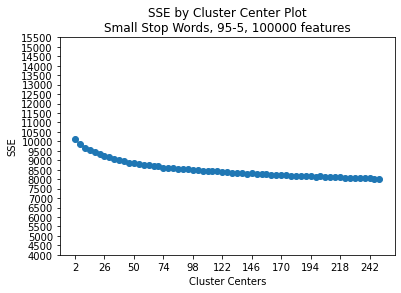

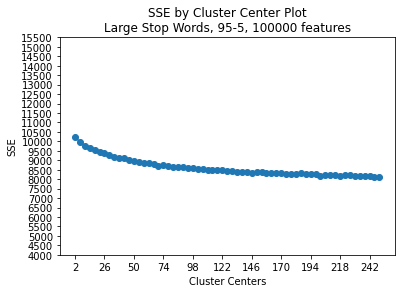

In [45]:
titles =  ["Small Stop Words, 95-5, 100000 features",
          "Large Stop Words, 95-5, 100000 features"]
#["Small Stop Words, 80-20, 200000 features",
          #"Small Stop Words, 95-5, 200000 features",

tfidfs = [tfidf_matrix_3, tfidf_matrix_4] # [tfidf_matrix_1, tfidf_matrix_2, 

for title, tfidf_matrix in zip(titles, tfidfs):
    find_optimal_clusters(tfidf_matrix, 250, title)

In [46]:
build_cluster(tfidf_matrix_4, tfidf_vectorizer_4)

NameError: name 'build_cluster' is not defined

Fit 2 clusters
Fit 6 clusters
Fit 10 clusters
Fit 14 clusters
Fit 18 clusters
Fit 22 clusters
Fit 26 clusters
Fit 30 clusters
Fit 34 clusters
Fit 38 clusters
Fit 42 clusters
Fit 46 clusters
Fit 50 clusters
Fit 54 clusters
Fit 58 clusters
Fit 62 clusters
Fit 66 clusters
Fit 70 clusters
Fit 74 clusters
Fit 78 clusters
Fit 82 clusters
Fit 86 clusters
Fit 90 clusters
Fit 94 clusters
Fit 98 clusters
Fit 102 clusters
Fit 106 clusters
Fit 110 clusters
Fit 114 clusters
Fit 118 clusters
Fit 122 clusters
Fit 126 clusters
Fit 130 clusters
Fit 134 clusters
Fit 138 clusters
Fit 142 clusters
Fit 146 clusters
Fit 150 clusters
Fit 154 clusters
Fit 158 clusters
Fit 162 clusters
Fit 166 clusters
Fit 170 clusters
Fit 174 clusters
Fit 178 clusters
Fit 182 clusters
Fit 186 clusters
Fit 190 clusters
Fit 194 clusters
Fit 198 clusters
Fit 202 clusters
Fit 206 clusters
Fit 210 clusters
Fit 214 clusters
Fit 218 clusters
Fit 222 clusters
Fit 226 clusters
Fit 230 clusters
Fit 234 clusters
Fit 238 clusters
Fit 242

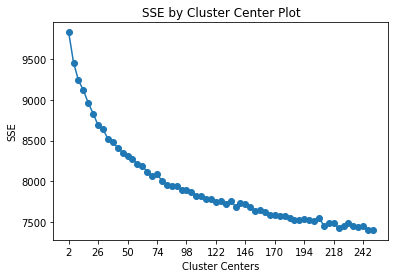

In [108]:
find_optimal_clusters(tfidf_matrix, 250)

Fit 2 clusters
Fit 6 clusters
Fit 10 clusters
Fit 14 clusters
Fit 18 clusters
Fit 22 clusters
Fit 26 clusters
Fit 30 clusters
Fit 34 clusters
Fit 38 clusters
Fit 42 clusters
Fit 46 clusters
Fit 50 clusters
Fit 54 clusters
Fit 58 clusters
Fit 62 clusters
Fit 66 clusters
Fit 70 clusters
Fit 74 clusters
Fit 78 clusters
Fit 82 clusters
Fit 86 clusters
Fit 90 clusters
Fit 94 clusters
Fit 98 clusters
Fit 102 clusters
Fit 106 clusters
Fit 110 clusters
Fit 114 clusters
Fit 118 clusters
Fit 122 clusters
Fit 126 clusters
Fit 130 clusters
Fit 134 clusters
Fit 138 clusters
Fit 142 clusters
Fit 146 clusters
Fit 150 clusters
Fit 154 clusters
Fit 158 clusters
Fit 162 clusters
Fit 166 clusters
Fit 170 clusters
Fit 174 clusters
Fit 178 clusters
Fit 182 clusters
Fit 186 clusters
Fit 190 clusters
Fit 194 clusters
Fit 198 clusters
Fit 202 clusters
Fit 206 clusters
Fit 210 clusters
Fit 214 clusters
Fit 218 clusters
Fit 222 clusters
Fit 226 clusters
Fit 230 clusters
Fit 234 clusters
Fit 238 clusters
Fit 242

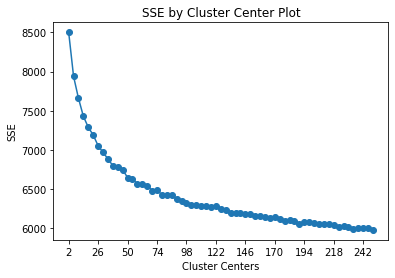

In [114]:
find_optimal_clusters(tfidf_matrix, 250)

In [113]:
#find_optimal_clusters(tfidf_matrix_highlights, 250)

In [ ]:
def generate_word_clouds(df, name):
    """generates and saves a word cloud of every cluster"""